**Harsha V Chunduri**

# **Project - Face Recognition**



# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive/MyColabProjects/9.34.7_FaceRecognition')

### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
with ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as zip:
  zip.extractall() 
  print('Done!') 

Done!


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

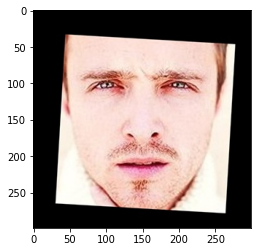

In [7]:
from matplotlib import pyplot as plt
plt.imshow(load_image('/content/drive/My Drive/MyColabProjects/9.34.7_FaceRecognition/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg'))
plt.show()

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()
model.load_weights('vgg_face_weights.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [13]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
# create an empty list embeddings
embeddings = []
# loop through the metadata
for index in range(metadata.shape[0]):
  # Get embedding vector for first image in the metadata using the pre-trained model
  img_path = metadata[index].image_path()
  img = load_image(img_path)

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
  try:
    embeddings.insert(index, vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0])
  except:
    print("Error - so adding np.zeros")
    embeddings.insert(index, np.zeros(2622))

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

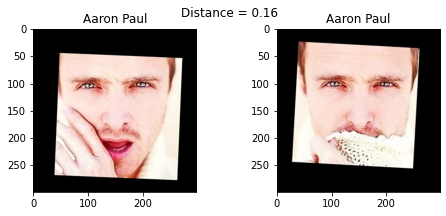

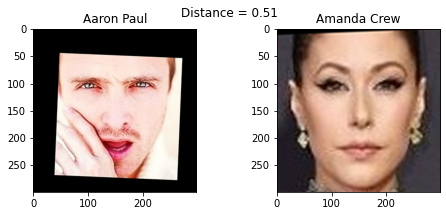

In [28]:
import matplotlib.pyplot as plt
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(121).title.set_text(metadata[idx1].name.split("_")[1])
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))
    plt.subplot(122).title.set_text(metadata[idx2].name.split("_")[1])

show_pair(2, 3)
show_pair(2, 180)

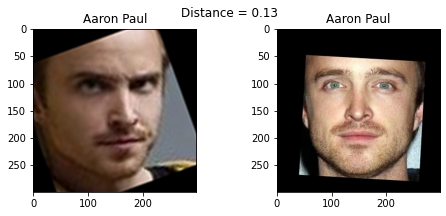

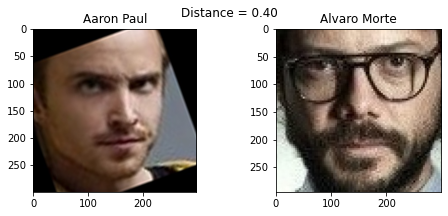

In [29]:
show_pair(30, 31)
show_pair(30, 100)

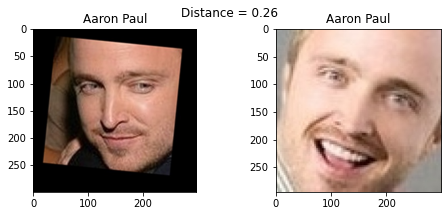

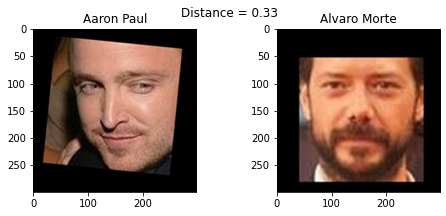

In [30]:
show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#Embeddings as an array
embeddings = np.asarray(embeddings)

#Load X_train and X_test with embeddings at train_idx and test_idx
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [0]:
#Load the names from filename into targets array
targets = np.array([m.name.split("_")[1] for m in metadata])

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(targets)
# Numerical encoding of identities
y = encoder.transform(targets)

In [0]:
#Load y_train and y_test with encoded labels
y_train = y[train_idx]
y_test = y[test_idx]

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [0]:
from sklearn import preprocessing
# Standarize features
from sklearn.preprocessing import StandardScaler

#Using StandardScaler
scaler = preprocessing.StandardScaler()

In [0]:
#Transforming the X_train and X_test and loading to X_train_std & X_test_std
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

# Declaring the PCA with 1000 components
pca = PCA(n_components=1000)

In [0]:
# Loading the transformed inputs into new dataset
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

In [226]:
# Shape of standardised input can be seen as having 2622 dimensions
X_train_std.shape

(9573, 2622)

In [225]:
# After PCA, the same vector has got only 1000 dimensions
X_train_pca.shape

(9573, 1000)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import f1_score, accuracy_score

In [261]:
linearSVC = LinearSVC()

linearSVC.fit(X_train_pca, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [262]:
acc_svc = accuracy_score(y_test, linearSVC.predict(X_test_pca))
print(f'linearSVC accuracy = {acc_svc}')

linearSVC accuracy = 0.014202172096908938


In [264]:
linearSVC.fit(X_train, y_train)

acc_svc = accuracy_score(y_test, linearSVC.predict(X_test))
print(f'linearSVC accuracy = {acc_svc}')

linearSVC accuracy = 0.9682539682539683


In [265]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
svc = SVC()

knn.fit(X_train, y_train)
svc5.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [266]:
acc_knn = accuracy_score(y_test, knn.predict(X_test))
acc_svc = accuracy_score(y_test, svc5.predict(X_test))

print(f'KNN accuracy = {acc_knn}, SVC accuracy = {acc_svc}')

KNN accuracy = 0.9223057644110275, SVC accuracy = 0.9640768588137009


# Based on all the above observations, we can see accuracy is good for Linear SVC with accuracy of 96.82%

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Image path:
PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg


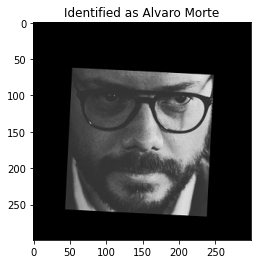

In [271]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10


example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = linearSVC.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]


plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print('Image path:')
print(metadata[test_idx][example_idx].image_path())

Image path:
PINS/pins_Alvaro Morte/Alvaro Morte15_870.jpg


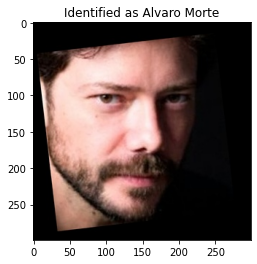

In [272]:
# Testing another image

example_idx = 12


example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = linearSVC.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]


plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print('Image path:')
print(metadata[test_idx][example_idx].image_path())

Image path:
PINS/pins_Amanda Crew/Amanda Crew91.jpg


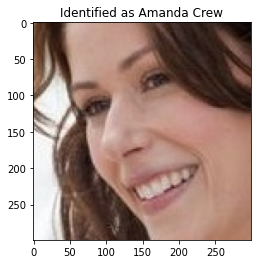

In [273]:
example_idx = 32


example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = linearSVC.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]


plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print('Image path:')
print(metadata[test_idx][example_idx].image_path())

Image path:
PINS/pins_jason isaacs/jason isaacs39_2107.jpg


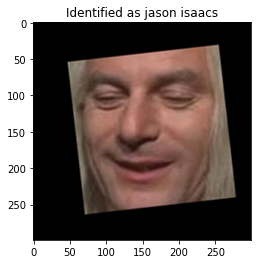

In [274]:
example_idx = 1000


example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = linearSVC.predict([embeddings[test_idx][example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]


plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

print('Image path:')
print(metadata[test_idx][example_idx].image_path())

From the above few test samples, we can see the image has been recognised exactly. 
It can be seen the name of image in file path and identified name are same.
